In [1]:
import pretty_midi

In [2]:
tr1 = pretty_midi.PrettyMIDI(initial_tempo=80)

In [3]:
tr1

In [4]:
help(tr1)

Help on PrettyMIDI in module pretty_midi.pretty_midi object:

class PrettyMIDI(__builtin__.object)
 |  A container for MIDI data in an easily-manipulable format.
 |  
 |  Parameters
 |  ----------
 |  midi_file : str or file
 |      Path or file pointer to a MIDI file.
 |      Default ``None`` which means create an empty class with the supplied
 |      values for resolution and initial tempo.
 |  resolution : int
 |      Resolution of the MIDI data, when no file is provided.
 |  intitial_tempo : float
 |      Initial tempo for the MIDI data, when no file is provided.
 |  
 |  Attributes
 |  ----------
 |  instruments : list
 |      List of :class:`pretty_midi.Instrument` objects.
 |  key_signature_changes : list
 |      List of :class:`pretty_midi.KeySignature` objects.
 |  time_signature_changes : list
 |      List of :class:`pretty_midi.TimeSignature` objects.
 |  lyrics : list
 |      List of :class:`pretty_midi.Lyric` objects.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, 

In [5]:
print tr1.instruments

[]


In [6]:
ins1 = pretty_midi.Instrument(0)

In [7]:
help(ins1)

Help on Instrument in module pretty_midi.instrument object:

class Instrument(__builtin__.object)
 |  Object to hold event information for a single instrument.
 |  
 |  Parameters
 |  ----------
 |  program : int
 |      MIDI program number (instrument index), in ``[0, 127]``.
 |  is_drum : bool
 |      Is the instrument a drum instrument (channel 9)?
 |  name : str
 |      Name of the instrument.
 |  
 |  Attributes
 |  ----------
 |  program : int
 |      The program number of this instrument.
 |  is_drum : bool
 |      Is the instrument a drum instrument (channel 9)?
 |  name : str
 |      Name of the instrument.
 |  notes : list
 |      List of :class:`pretty_midi.Note` objects.
 |  pitch_bends : list
 |      List of of :class:`pretty_midi.PitchBend` objects.
 |  control_changes : list
 |      List of :class:`pretty_midi.ControlChange` objects.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, program, is_drum=False, name='')
 |      Create the Instrument.
 |  
 |  __repr__(se

In [8]:
note1 = pretty_midi.Note
note1.velocity = 100
note1.pitch = 48
note1.start = 0.0
note1.end = 1.0
print note1

<class 'pretty_midi.containers.Note'>


In [9]:
ins1.notes = note1
print ins1.notes

<class 'pretty_midi.containers.Note'>


In [10]:
note2 = pretty_midi.Note(100,52,1.0,2.0)

In [11]:
mel = [note1, note2]
ins1.notes = mel

In [12]:
# Let's add a few more notes to our instrument
velocity = 100
for pitch, start, end in zip([60, 62, 64], [0.2, 0.6, 1.0], [1.1, 1.7, 2.3]):
    mel.append(pretty_midi.Note(velocity, pitch, start, end))
print ins1.notes

[<class 'pretty_midi.containers.Note'>, Note(start=1.000000, end=2.000000, pitch=52, velocity=100), Note(start=0.200000, end=1.100000, pitch=60, velocity=100), Note(start=0.600000, end=1.700000, pitch=62, velocity=100), Note(start=1.000000, end=2.300000, pitch=64, velocity=100)]


In [13]:
tr1.instruments.append(ins1)

In [14]:
PR = ins1.get_piano_roll()
help(ins1.get_piano_roll)

Help on method get_piano_roll in module pretty_midi.instrument:

get_piano_roll(self, fs=100, times=None) method of pretty_midi.instrument.Instrument instance
    Compute a piano roll matrix of this instrument.
    
    Parameters
    ----------
    fs : int
        Sampling frequency of the columns, i.e. each column is spaced apart
        by ``1./fs`` seconds.
    times : np.ndarray
        Times of the start of each column in the piano roll.
        Default ``None`` which is ``np.arange(0, get_end_time(), 1./fs)``.
    
    Returns
    -------
    piano_roll : np.ndarray, shape=(128,times.shape[0])
        Piano roll of this instrument.



In [15]:
print PR

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

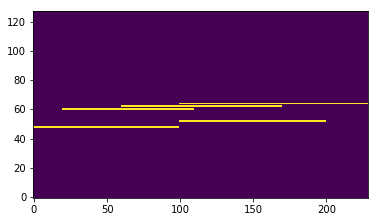

In [17]:
plt.imshow(PR, origin = 'lower')

In [18]:
tr1.instruments.append(ins1)

In [19]:
tr1.write('myfirstmidi.mid')

In [20]:
au1 = tr1.synthesize(fs=22050)

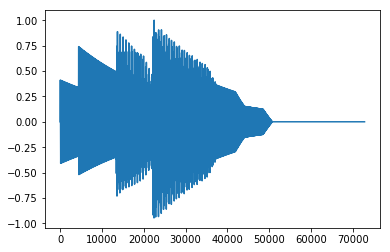

In [21]:
plt.plot(au1)

In [22]:
type(au1)

numpy.ndarray

In [23]:
au1[0:100]

array([ 0.        ,  0.01534017,  0.03065764,  0.04593113,  0.06113942,
        0.0762614 ,  0.09127606,  0.10616256,  0.12090022,  0.13546859,
        0.14984744,  0.16401681,  0.17795704,  0.19164878,  0.20507304,
        0.21821119,  0.231045  ,  0.24355667,  0.25572886,  0.26754467,
        0.27898773,  0.29004217,  0.30069268,  0.31092449,  0.32072343,
        0.33007592,  0.33896901,  0.34739039,  0.3553284 ,  0.36277206,
        0.36971107,  0.37613584,  0.38203749,  0.38740786,  0.39223955,
        0.39652589,  0.40026098,  0.40343968,  0.40605761,  0.40811121,
        0.40959765,  0.41051494,  0.41086185,  0.41063794,  0.40984358,
        0.40847993,  0.40654893,  0.40405332,  0.40099661,  0.3973831 ,
        0.39321787,  0.38850674,  0.38325632,  0.37747394,  0.37116769,
        0.36434637,  0.35701952,  0.34919734,  0.34089076,  0.33211136,
        0.32287138,  0.31318369,  0.3030618 ,  0.2925198 ,  0.28157238,
        0.27023479,  0.25852281,  0.24645274,  0.23404139,  0.22

In [24]:
import IPython.display as ipydisplay
ipydisplay.Audio(data=au1, rate=22050)

In [27]:
import librosa
import numpy as np
F1 = librosa.stft(au1, n_fft=1024, win_length=1024, hop_length=512)

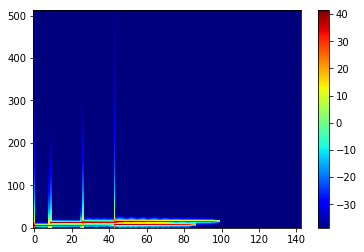

In [39]:
#plt.figure(figsize=(9,2))
plt.imshow(librosa.amplitude_to_db(np.abs(F1)), aspect='auto', origin='bottom', cmap='jet')
plt.colorbar()

Let's load the audio from same midi file synthesized using an instrument (using musscore) 

In [34]:
au2, sr = librosa.load('myfirstmidi.wav')

In [35]:
np.shape(au2)

(132352,)

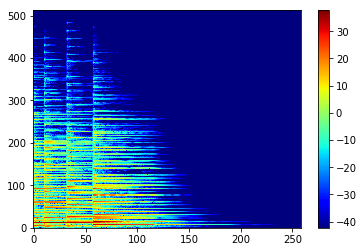

In [36]:
F2 = librosa.stft(au2, n_fft=1024, win_length=1024, hop_length=512)
plt.imshow(librosa.amplitude_to_db(np.abs(F2)), aspect='auto', origin='bottom', cmap='jet')
plt.colorbar()

In [40]:
CQ1 = librosa.core.cqt(au1, sr=16000)

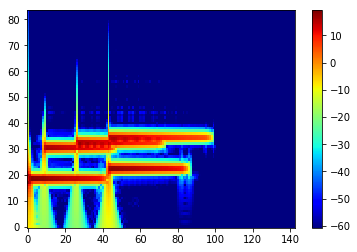

In [41]:
plt.imshow(librosa.amplitude_to_db(np.abs(CQ1)), aspect='auto', origin='bottom', cmap='jet')
plt.colorbar()